# ***🛒 Shopper Spectrum: Customer Segmentation and Product Recommendations in E-Commerce***



In the modern e-commerce landscape, vast volumes of transaction data are generated daily. Analyzing such data offers significant opportunities to understand customer behavior, segment them effectively, and recommend relevant products. The "Shopper Spectrum" project addresses this challenge by leveraging unsupervised learning and recommendation techniques on an online retail dataset.

The project begins with thorough data cleaning and exploratory data analysis (EDA) to uncover patterns in sales and customer behavior. Core to the segmentation approach is the RFM (Recency, Frequency, Monetary) analysis, which captures how recently and frequently customers purchase, and how much they spend. These engineered features are then standardized and clustered using the K-Means algorithm, with validation via the elbow method and silhouette scores.

Four distinct customer segments are derived:
- **High-Value:** Frequent, recent, and high-spending customers.
- **Regular:** Consistent spenders, though not premium.
- **Occasional:** Infrequent buyers with low monetary value.
- **At-Risk:** Customers who haven’t purchased in a long time.

Complementing segmentation, a product recommendation system is developed using item-based collaborative filtering. This identifies products similar to a user-input item using cosine similarity on the purchase matrix, returning the top 5 recommended items.

The final solution is deployed as a Streamlit app, offering two modules:
1. **Product Recommendation** – Recommends 5 similar products based on an input product name.
2. **Customer Segmentation** – Predicts the customer segment based on their RFM values.

This project demonstrates real-world applications in targeted marketing, inventory planning, and personalized customer experiences in the e-commerce sector.

In [ ]:
#

## *GITHUB LINK*

https://github.com/vikasgodiya/Shopper-Spectrum_-Segmentation-and-Recommendations

##Section 1: Dataset Overview

In [ ]:


import pandas as pd

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/online_retail.csv", encoding='ISO-8859-1')

# Display the first few rows
print("🔹 Sample Data:")
display(df.head())

# Check structure and types
print("\n\n🔹 Data Info:")
df.info()

# Summary statistics for numeric columns
print("\n\n🔹 Statistical Summary:")
display(df.describe())

# Count missing values
print("\n\n🔹 Missing Values:")
print(df.isnull().sum())

# Check for duplicates
print("\n\n🔹 Duplicate Rows:")
print(f"Total duplicate entries: {df.duplicated().sum()}")


🔹 Sample Data:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom




🔹 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


🔹 Statistical Summary:


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000




🔹 Missing Values:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


🔹 Duplicate Rows:
Total duplicate entries: 5268




---



## Section 2: Data Preprocessing

In [ ]:
# Step 1: Remove rows with missing CustomerID
df_clean = df.dropna(subset=['CustomerID'])

In [ ]:
# Step 2: Exclude cancelled invoices (InvoiceNo starting with 'C')
df_clean = df_clean[~df_clean['InvoiceNo'].astype(str).str.startswith('C')]

In [ ]:
# Step 3: Remove rows with Quantity <= 0 or UnitPrice <= 0
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]

In [ ]:
# Step 4: Create a new column 'TotalPrice'
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

In [ ]:
# Step 5: Reset index after cleaning (optional, but tidy)
df_clean.reset_index(drop=True, inplace=True)

In [ ]:
# Step 6: Display cleaning summary
print("✅ Data Preprocessing Completed")
print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_clean.shape}")
print("\nRemaining Missing Values:")
print(df_clean.isnull().sum())

✅ Data Preprocessing Completed
Original shape: (541909, 8)
Cleaned shape: (397884, 9)

Remaining Missing Values:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensuring InvoiceDate is datetime
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

### *Insight 1️. Transaction volume by country*

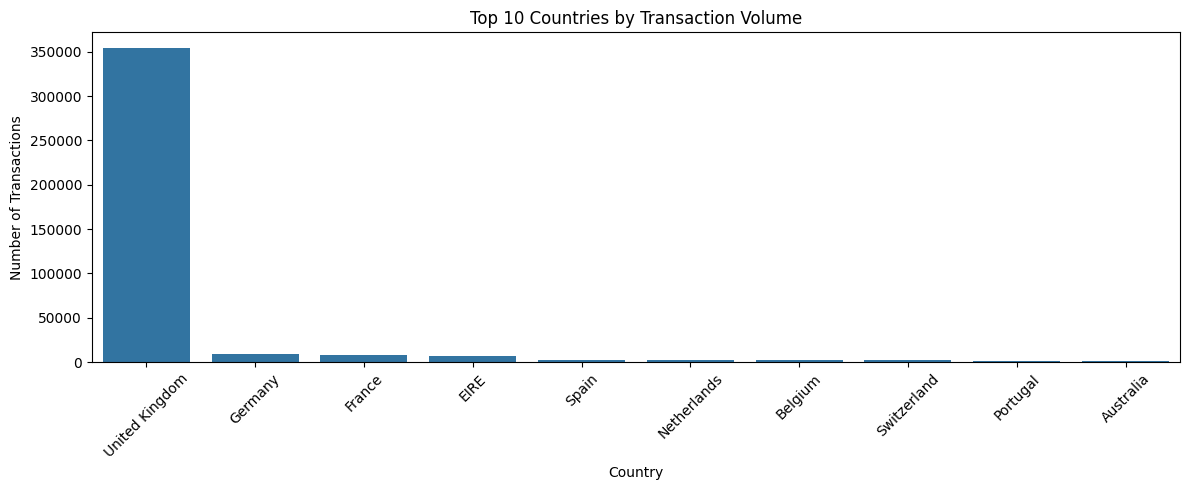

In [ ]:

country_counts = df_clean['Country'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x=country_counts.head(10).index, y=country_counts.head(10).values)
plt.title("Top 10 Countries by Transaction Volume")
plt.xlabel("Country")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The United Kingdom overwhelmingly dominates in terms of transaction count, indicating it is the core market for this e-commerce business. Other countries like Germany, France, and EIRE contribute far less, suggesting region-specific strategies may be useful.

### *Insight 2 :  Top-selling products by quantity*

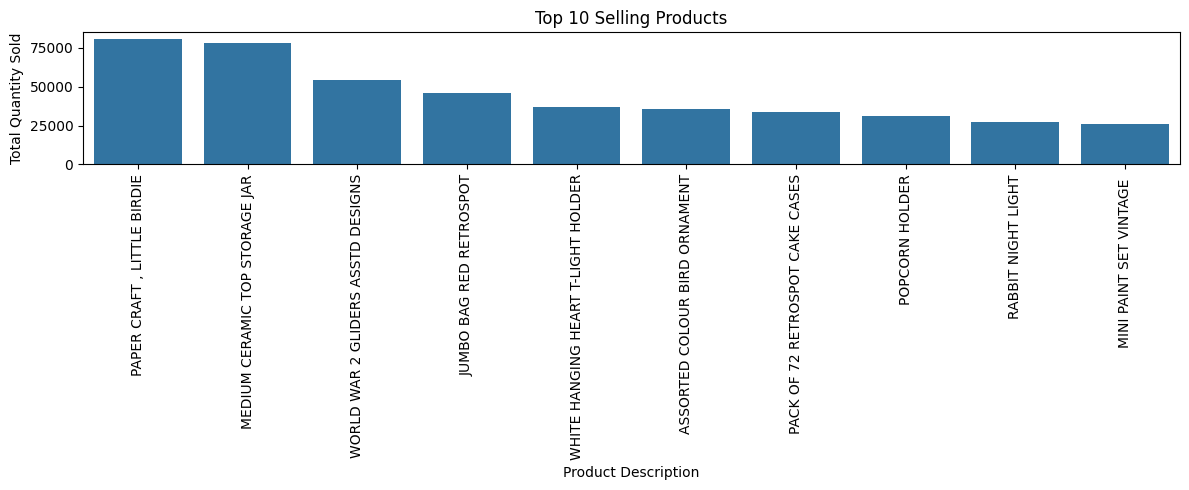

In [ ]:

top_products = df_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title("Top 10 Selling Products")
plt.xlabel("Product Description")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The top-selling products are primarily home décor and utility items such as "PAPER CRAFT, LITTLE BIRDIE" and "WHITE HANGING HEART T-LIGHT HOLDER." These products account for the highest quantities sold, signaling high customer interest or effective promotion.

### *Insight 3 : Purchase trends over time (Monthly sales)*

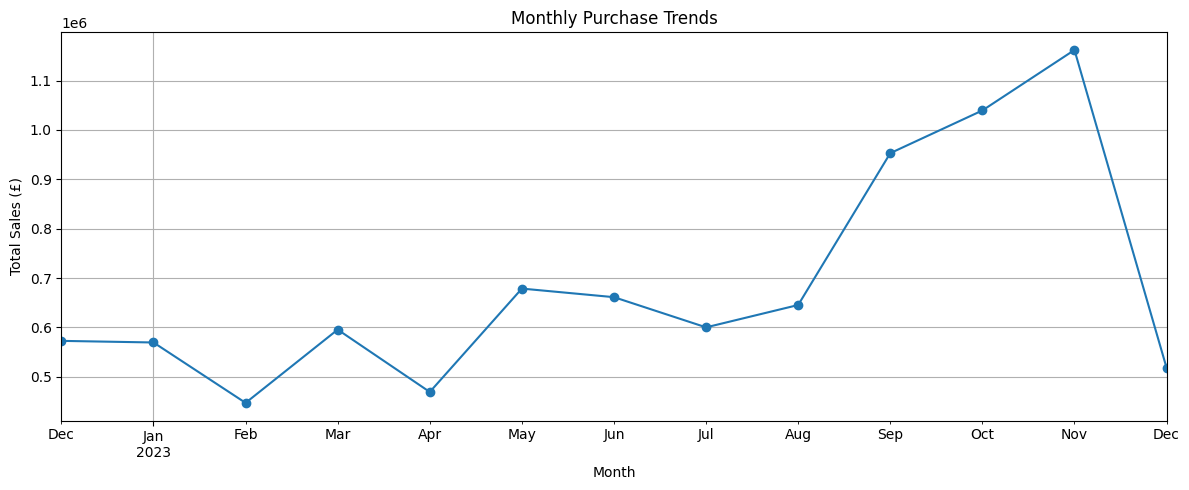

In [ ]:
df_clean['InvoiceMonth'] = df_clean['InvoiceDate'].dt.to_period('M')
monthly_sales = df_clean.groupby('InvoiceMonth')['TotalPrice'].sum()

plt.figure(figsize=(12, 5))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Purchase Trends")
plt.ylabel("Total Sales (£)")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()

Sales show a strong upward trend towards the end of the year, especially around September to November. This suggests seasonal demand — possibly due to holidays — making it crucial for inventory and marketing planning.

### *Insight 4 : Monetary distribution per customer*

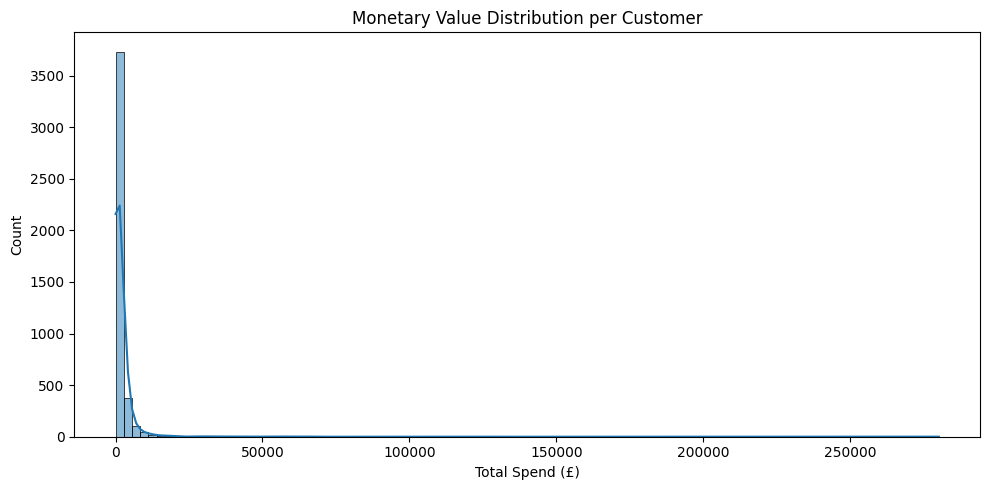

In [ ]:
# 4️⃣ Monetary distribution per customer
monetary_dist = df_clean.groupby('CustomerID')['TotalPrice'].sum()

plt.figure(figsize=(10, 5))
sns.histplot(monetary_dist, bins=100, kde=True)
plt.title("Monetary Value Distribution per Customer")
plt.xlabel("Total Spend (£)")
plt.tight_layout()
plt.show()

The distribution is heavily right-skewed, with most customers spending relatively little. A small group of high spenders contributes disproportionately to the revenue, highlighting the value of retaining and targeting premium customers.

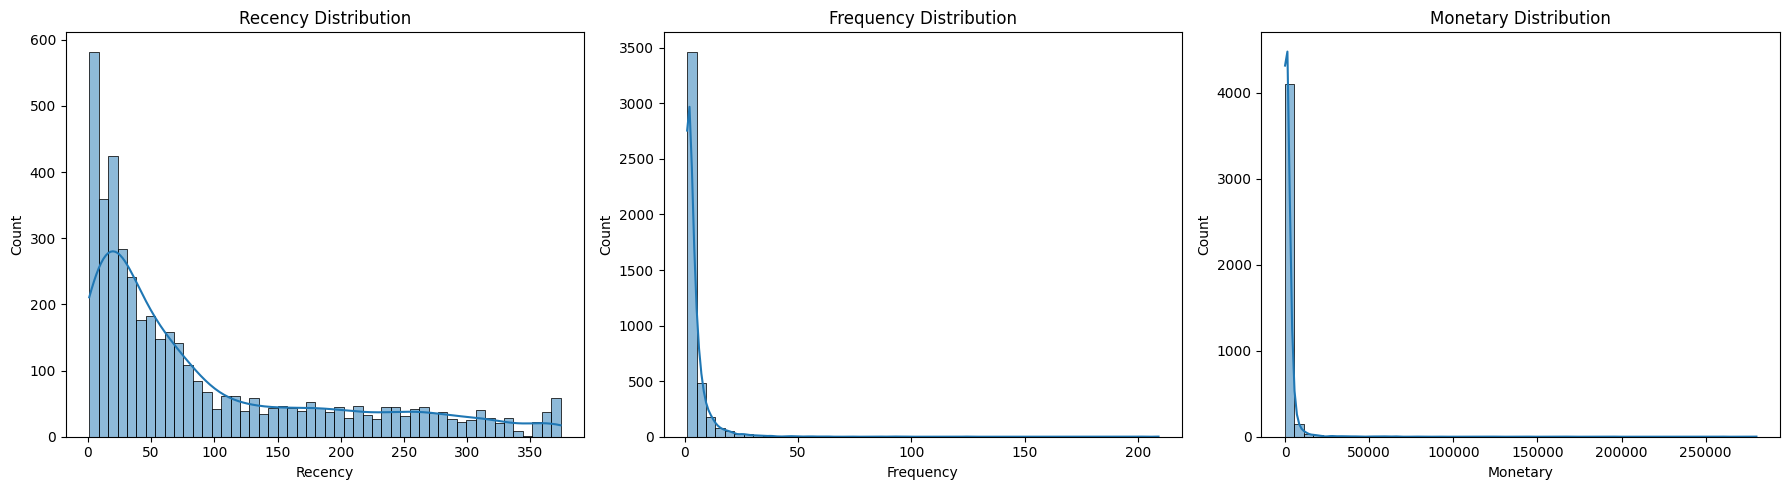

In [ ]:
# RFM Feature Engineering (needed before plotting RFM distributions)
latest_date = df_clean['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                  # Frequency
    'TotalPrice': 'sum'                                      # Monetary
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}).reset_index()

# Plot RFM Histograms
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(rfm['Recency'], bins=50, ax=axs[0], kde=True)
axs[0].set_title('Recency Distribution')

sns.histplot(rfm['Frequency'], bins=50, ax=axs[1], kde=True)
axs[1].set_title('Frequency Distribution')

sns.histplot(rfm['Monetary'], bins=50, ax=axs[2], kde=True)
axs[2].set_title('Monetary Distribution')

plt.tight_layout()
plt.show()


Recency: Most customers purchased recently (low recency value), implying high current engagement.

Frequency: Majority of customers made fewer purchases, showing one-time or low-frequency behavior.

Monetary: Spending patterns again show a skewed distribution — most customers spend less, but a few spend significantly more.

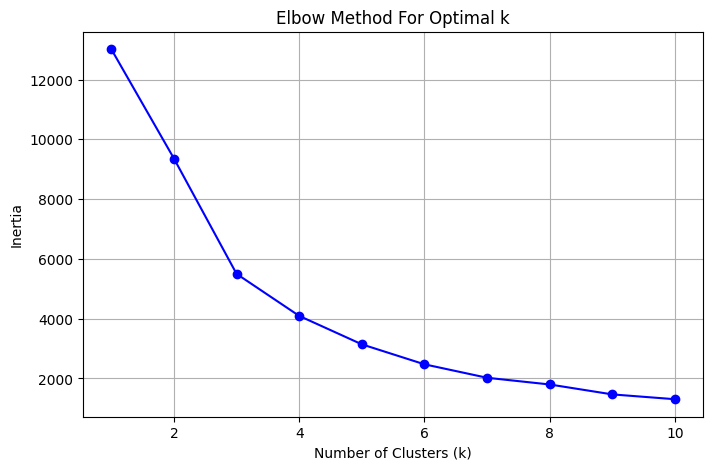

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normalize RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Elbow curve
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


The elbow point appears around k = 4, indicating that 4 customer clusters would be an ideal choice for segmentation based on RFM scores. This aligns well with the labeled clusters like High-Value, Regular, Occasional, and At-Risk.

In [ ]:
# 📌 Step 1: RFM Calculation
from datetime import timedelta

# Reference date: 1 day after last transaction
latest_date = df_clean['InvoiceDate'].max() + timedelta(days=1)

# Create RFM table
rfm = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,   # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'TotalPrice': 'sum'                                       # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# 📌 Step 2: Normalize RFM
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# 📌 Step 3: KMeans Clustering (k=4 from elbow method)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# 📌 Step 4: Cluster Profile Summary
cluster_profile = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Num_Customers'}).reset_index()

print("✅ Customer Cluster Profiles:")
display(cluster_profile)


✅ Customer Cluster Profiles:


,Cluster,Recency,Frequency,Monetary,Num_Customers
0,0,43.702685,3.682711,1359.049284,3054
1,1,248.075914,1.552015,480.617480,1067
2,2,7.384615,82.538462,127338.313846,13
3,3,15.500000,22.333333,12709.090490,204


| Cluster | Recency ↓ (days) | Frequency ↑ | Monetary ↑ (£) | Num\_Customers | Interpretation                                                                                        |
| ------- | ---------------- | ----------- | -------------- | -------------- | ----------------------------------------------------------------------------------------------------- |
| **0**   | 43.7             | 3.68        | 1,359          | 3,054          | **Regular** – Customers purchase moderately frequently and recently, but aren't high spenders.        |
| **1**   | 248.1            | 1.55        | 480            | 1,067          | **At-Risk** – Haven’t purchased in a long time, low frequency, and low spend. Likely churned.         |
| **2**   | 7.38             | 82.5        | 127,338        | 13             | **High-Value** – Very recent, extremely frequent buyers who spend a lot. Very small, premium segment. |
| **3**   | 15.5             | 22.3        | 12,709         | 204            | **Loyal** – Active and high-spending customers. Not elite like cluster 2 but very valuable.           |




> Cluster 0 represents a broad base of regular but average customers.

> Cluster 1 is a red flag group — they need win-back campaigns.

> Cluster 2 is your most valuable segment but extremely rare.

> Cluster 3 are loyal repeat buyers — good candidates for upsell or rewards.






---



---



In [ ]:
# Assigning labels based on profile interpretation
def label_segment(row):
    if row['Cluster'] == 2:
        return 'High-Value'
    elif row['Cluster'] == 3:
        return 'Loyal'
    elif row['Cluster'] == 0:
        return 'Regular'
    else:
        return 'At-Risk'

rfm['Segment'] = rfm.apply(label_segment, axis=1)

# Preview labeled data
rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Cluster', 'Segment']].head()


,CustomerID,Recency,Frequency,Monetary,Cluster,Segment
0,12346.0,326,1,77183.60,3,Loyal
1,12347.0,2,7,4310.00,0,Regular
2,12348.0,75,4,1797.24,0,Regular
3,12349.0,19,1,1757.55,0,Regular
4,12350.0,310,1,334.40,1,At-Risk


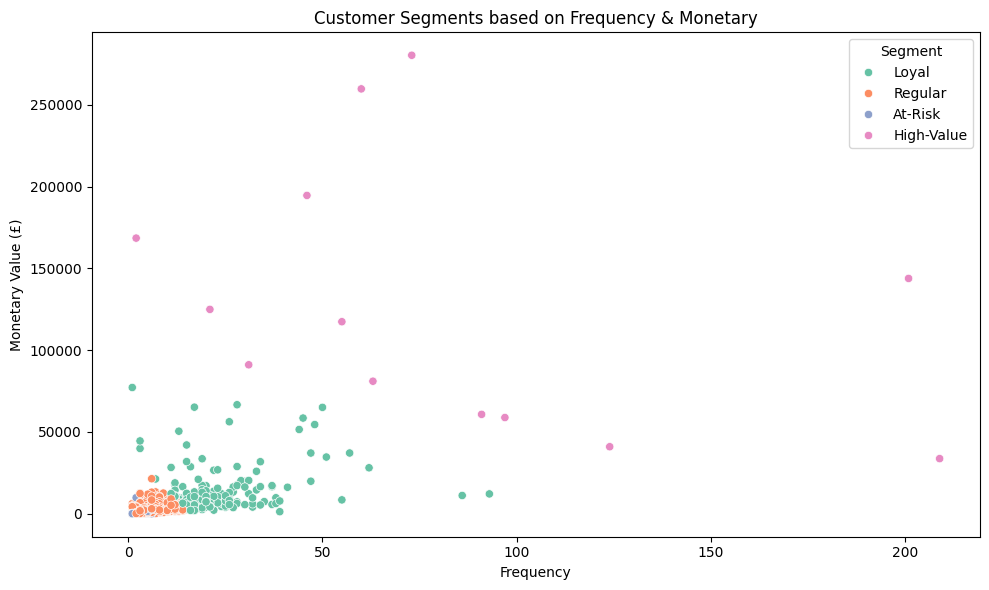

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 2D scatter plot: Frequency vs Monetary colored by Segment
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Segment', palette='Set2')
plt.title('Customer Segments based on Frequency & Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value (£)')
plt.legend(title='Segment')
plt.tight_layout()
plt.show()


This plot shows clear separation:

-- High-Value customers (pink) are positioned far right and high up, indicating both frequent purchases and high total spend.

-- Loyal customers (green) also show good frequency and monetary value but less than high-value.

-- Regular (orange) and At-Risk (blue) clusters are tightly packed with low values, indicating lower commercial importance.

In [ ]:
import plotly.express as px

# Make sure your `rfm` DataFrame includes: Recency, Frequency, Monetary, and Segment columns

# 3D Plot
fig = px.scatter_3d(
    rfm,
    x='Recency',
    y='Frequency',
    z='Monetary',
    color='Segment',  # Categorical labels like 'High-Value', 'At-Risk', etc.
    title='3D Scatter Plot of Customer Segments (RFM)',
    hover_data=['CustomerID']
)

# Show the plot
fig.show()


The 3D visualization reinforces segment distinctions:

-- High-Value and Loyal segments are clustered in regions of low recency (recent purchases), high frequency, and high spend.

-- At-Risk customers are on the far end of the Recency axis (i.e., haven’t purchased in a long time).

-- This plot visually confirms that RFM segmentation effectively separates customer types in multidimensional space.

## Recommendation System

In [ ]:
# 📌 Step 1: Create Customer–Item Matrix
product_user_matrix = df_clean.pivot_table(
    index='StockCode',
    columns='CustomerID',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

# 📌 Step 2: Compute Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity

product_similarity = cosine_similarity(product_user_matrix)
product_similarity_df = pd.DataFrame(product_similarity,
                                     index=product_user_matrix.index,
                                     columns=product_user_matrix.index)

# 📌 Step 3: Map StockCode to Product Name
product_names = df_clean.drop_duplicates(subset=['StockCode'])[['StockCode', 'Description']]
product_names_dict = dict(zip(product_names['StockCode'], product_names['Description']))

# 📌 Step 4: Recommendation Function
def recommend_similar_products(product_code, top_n=5):
    if product_code not in product_similarity_df.index:
        return f"❌ Product code '{product_code}' not found."

    similar_scores = product_similarity_df[product_code].sort_values(ascending=False)
    similar_codes = similar_scores.iloc[1:top_n+1].index
    recommendations = [(code, product_names_dict.get(code, "Unknown")) for code in similar_codes]
    return recommendations

# 📌 Example: Recommend for a sample product
sample_product = '84029E'  # Red Woolly Hottie White Heart
recommend_similar_products(sample_product)


[('82615', 'PINK MARSHMALLOW SCARF KNITTING KIT'),
 ('21107', 'CREAM SLICE FLANNEL PINK SPOT '),
 ('85038', '6 CHOCOLATE LOVE HEART T-LIGHTS'),
 ('22095', 'LADS ONLY TISSUE BOX'),
 ('72802A', 'ROSE SCENT CANDLE IN JEWELLED BOX')]

These are the 5 most similar products to the given input based on customer buying patterns:

-- The results suggest thematic similarity — e.g., gift-like or cozy items (knitting kit, heart t-lights, candles).

-- This reinforces that the collaborative filtering model is effectively learning from customer preferences and co-occurrences.

-- Perfect for implementing "Customers who bought this also bought..." logic in your app.

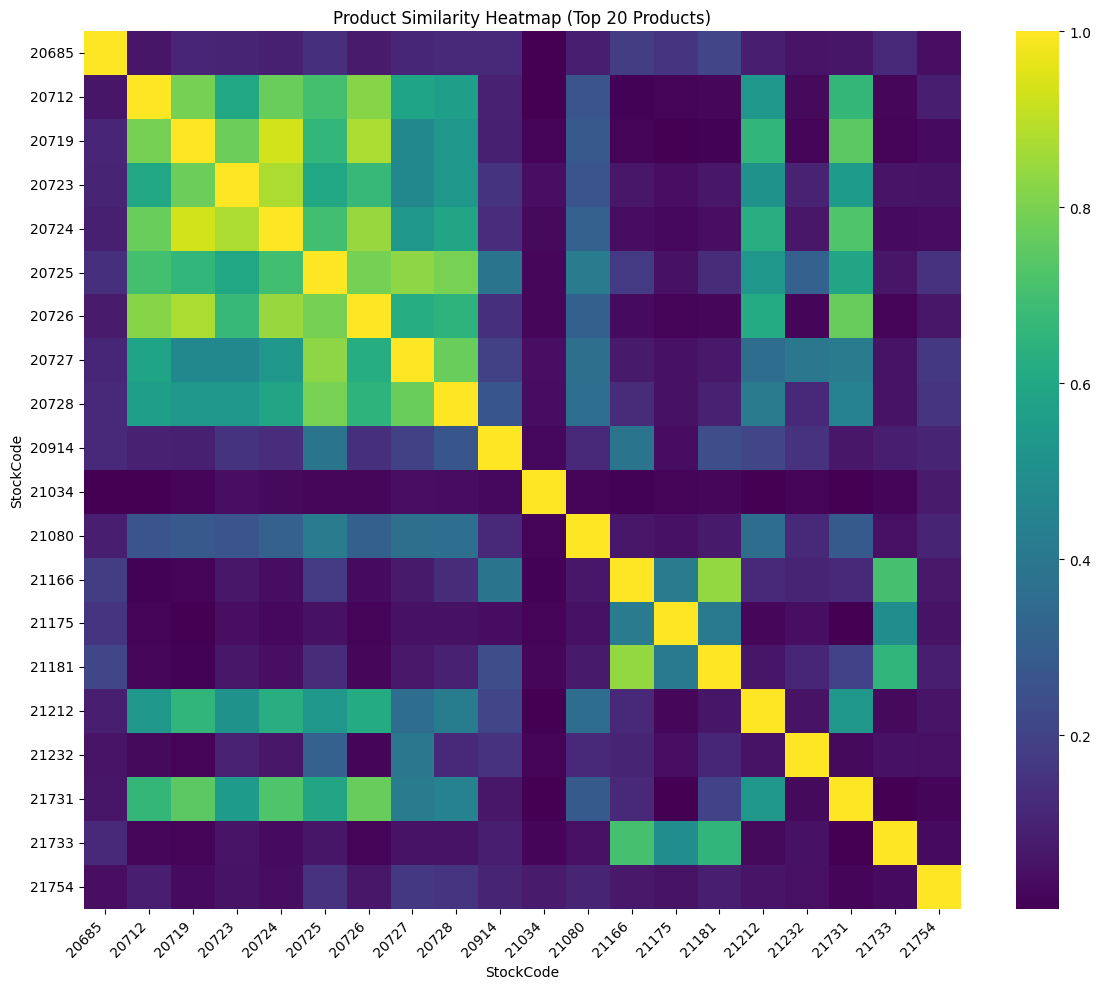

In [ ]:
# 📌 Filter for Top 100 Products by Quantity Sold
top_100_products = df['StockCode'].value_counts().head(100).index
filtered_df = df[df['StockCode'].isin(top_100_products)]

# 📌 Create a smaller Product-User Matrix
product_user_matrix = filtered_df.pivot_table(
    index='StockCode',
    columns='CustomerID',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

# 📌 Compute Cosine Similarity on Top Products
product_similarity = cosine_similarity(product_user_matrix)
product_similarity_df = pd.DataFrame(
    product_similarity,
    index=product_user_matrix.index,
    columns=product_user_matrix.index
)

# 📌 Heatmap: Top 20 Similar Products
subset = product_similarity_df.iloc[:20, :20]

plt.figure(figsize=(12, 10))
sns.heatmap(subset, cmap='viridis', xticklabels=True, yticklabels=True)
plt.title("Product Similarity Heatmap (Top 20 Products)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


This heatmap shows pairwise cosine similarity scores between the top 20 selling products based on customer co-purchase behavior.

-- Bright yellow diagonal represents perfect self-similarity.

-- Clusters of lighter (yellow-green) off-diagonal blocks indicate groups of products often bought together — potential bundles.

-- For example, products 20712, 20723, and 20724 are highly similar, suggesting a shared usage context or customer preference group.

In [ ]:
import joblib
import pickle

# === Saving KMeans RFM Model ===
joblib.dump(kmeans, "kmeans_rfm_model.pkl")

# === Saving the StandardScaler used for RFM ===
joblib.dump(scaler, "rfm_scaler.pkl")

# === Saving Product Name Dictionary for Lookup ===
product_names = df_clean.drop_duplicates(subset=['StockCode'])[['StockCode', 'Description']]
product_names_dict = dict(zip(product_names['StockCode'], product_names['Description']))

with open("product_name_map.pkl", "wb") as f:
    pickle.dump(product_names_dict, f)

# === Saving Product Similarity Matrix (if needed for quick lookup) ===
with open("product_similarity_matrix.pkl", "wb") as f:
    pickle.dump(product_similarity_df, f)
